# Clustering
Clustering is an important technique to group similar image pixels based on their signal properties, such as brightness, color, or even morphological features.

## Data
In this lecture, we will use the same coin image as the lecture material.

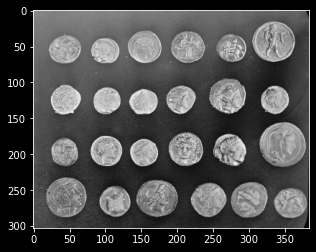

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data

image = data.coins()
plt.imshow(image, cmap="gray")

## Insepct the piexl distribution
* Here we have to redefine our plotting function to deal with clustering information. We don't need to cover the details for now.

In [3]:
def plot_histogram(data, which_cluster=None, nbin=40):
    data = data.reshape(-1)
    if which_cluster is None:
        which_cluster = np.zeros(data.shape, dtype=int)
    else:
        which_cluster = which_cluster.reshape(-1)
    fig, ax = plt.subplots()
    bins = np.linspace(data.min(), data.max(), nbin)
    for k in np.unique(which_cluster):
        subset = data[which_cluster==k]
        ax.hist(subset, bins=bins, alpha=0.8,
                label="Cluster %d" % k, edgecolor="black")
    ax.legend()
    plt.show()

* We can turn the 2D image into 1D signals by NumPy.

In [4]:
# keep the dimension information for recovering the matrix dimension
h, w = image.shape
# flatten: reshape 2D image into 1D signal
signals =  image.reshape(h * w).astype(int)
# inspect the signals
signals[:20]

array([ 47, 123, 133, 129, 137, 132, 138, 135, 134, 133, 131, 130, 129,
       129, 128, 128, 130, 131, 132, 133])

* You will found that the distributions are exact the same

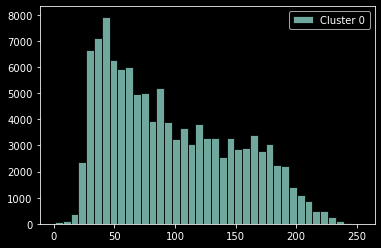

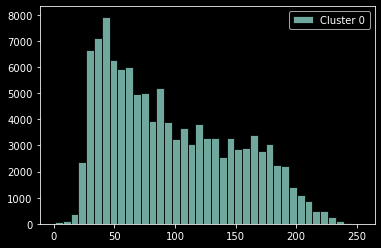

In [5]:
plot_histogram(image)
plot_histogram(signals)

## K-Means Clustering Algorithm
K-means clustering algorithm is an iterative strategy to minimize the distance between each point to the cluster centers.

### Stage of Assignment

* First, say we want to cluster pixels into three group. Hence, we assign k = 3. And we can randomly generate centers for each cluster.

In [6]:
k = 3
centers = np.random.choice(signals, k)

In [7]:
# create a container to store the distances
distances = np.zeros((w * h, k))
print("Dimension: ", distances.shape)
print(distances)

Dimension:  (116352, 3)
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 ...
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


In [8]:
for i, signal in enumerate(signals):
    for j, center in enumerate(centers):
        distances[i, j] = abs(signal - center)
distances

array([[ 15.,  97.,  50.],
       [ 91.,  21.,  26.],
       [101.,  11.,  36.],
       ...,
       [ 28., 140.,  93.],
       [ 22., 134.,  87.],
       [ 25., 137.,  90.]])

In [9]:
which_cluster = np.argmin(distances, axis=1)
which_cluster

array([0, 1, 1, ..., 0, 0, 0])

In [10]:
for i in range(k):
    centers[i] = signals[which_cluster == i].mean()

In [11]:
def assignment(signals, centers):
    n = len(signals)
    k = len(centers)
    distances = np.zeros((n, k))
    for i, signal in enumerate(signals):
        for j, center in enumerate(centers):
            distances[i, j] = abs(signal - center)
    which_cluster = np.argmin(distances, axis=1)
    return which_cluster

In [12]:
def update(signals, which_cluster, k):
    new_centers = np.zeros(k)
    for i in range(k):
        new_centers[i] = signals[which_cluster == i].mean()
    return new_centers

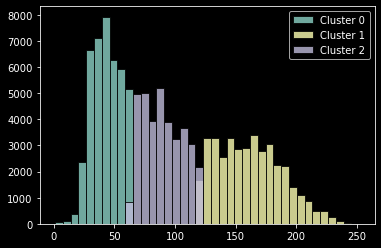

In [13]:
plot_histogram(signals, which_cluster)

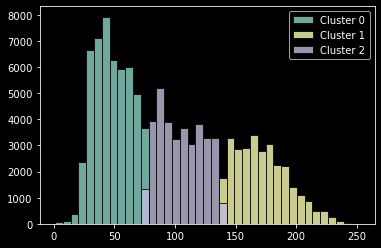

In [14]:
for i in range(20):
    which_cluster = assignment(signals, centers)
    centers = update(signals, which_cluster, k)
plot_histogram(signals, which_cluster)

In [15]:
image_cluster = which_cluster.reshape((h, w))

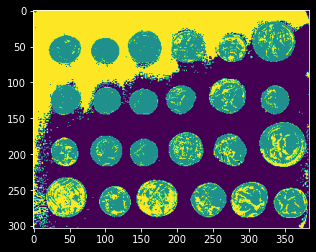

In [16]:
plt.imshow(image_cluster)

In [17]:
def kmeans(image, k, n_iter):
    h, w = image.shape
    signals = image.reshape(h * w).astype(int)
    centers = np.random.choice(signals, k)
    for _ in range(n_iter):
        which_cluster = assignment(signals, centers)
        centers = update(signals, which_cluster, k)
    image_cluster = which_cluster.reshape((h, w))
    return image_cluster, centers

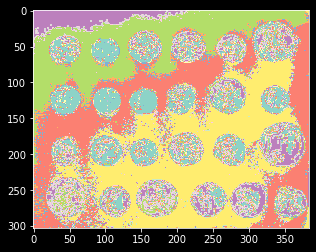

In [28]:
image_cluster, centers = kmeans(image, k=5, n_iter=5)

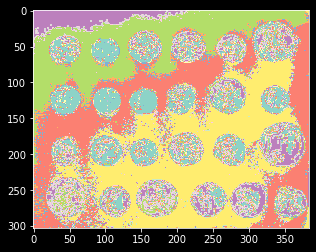

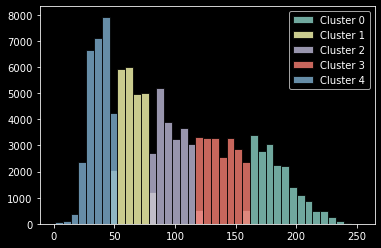

In [29]:
plt.imshow(image_cluster, cmap="Set3")
plot_histogram(image, image_cluster)

In [20]:
image_cluster, centers = kmeans(image, k=10, n_iter=5)


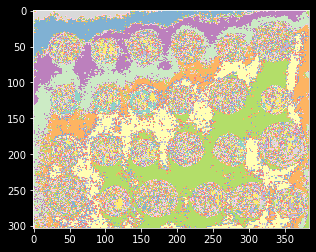

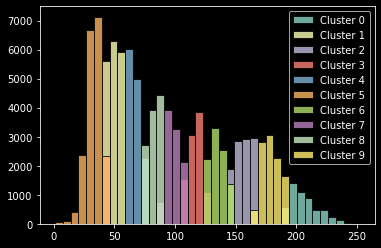

In [26]:
plt.imshow(image_cluster, cmap="Set3")
plot_histogram(image, image_cluster)

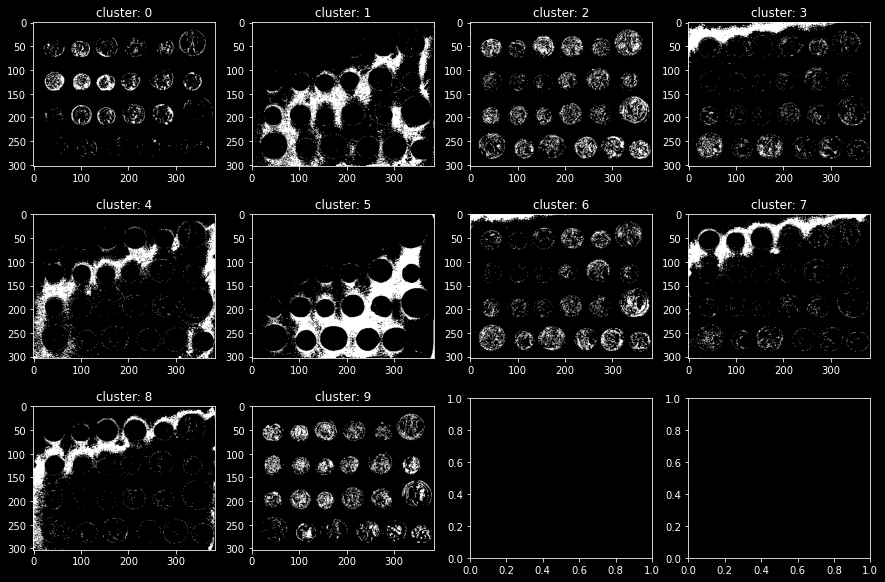

In [22]:
fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))
i = 0
for r in range(3):
    for c in range(4):
        if i < 10:
            axs[r, c].imshow(image_cluster == i, cmap="gray")
            axs[r, c].set_title("cluster: %d" % i)
        i += 1


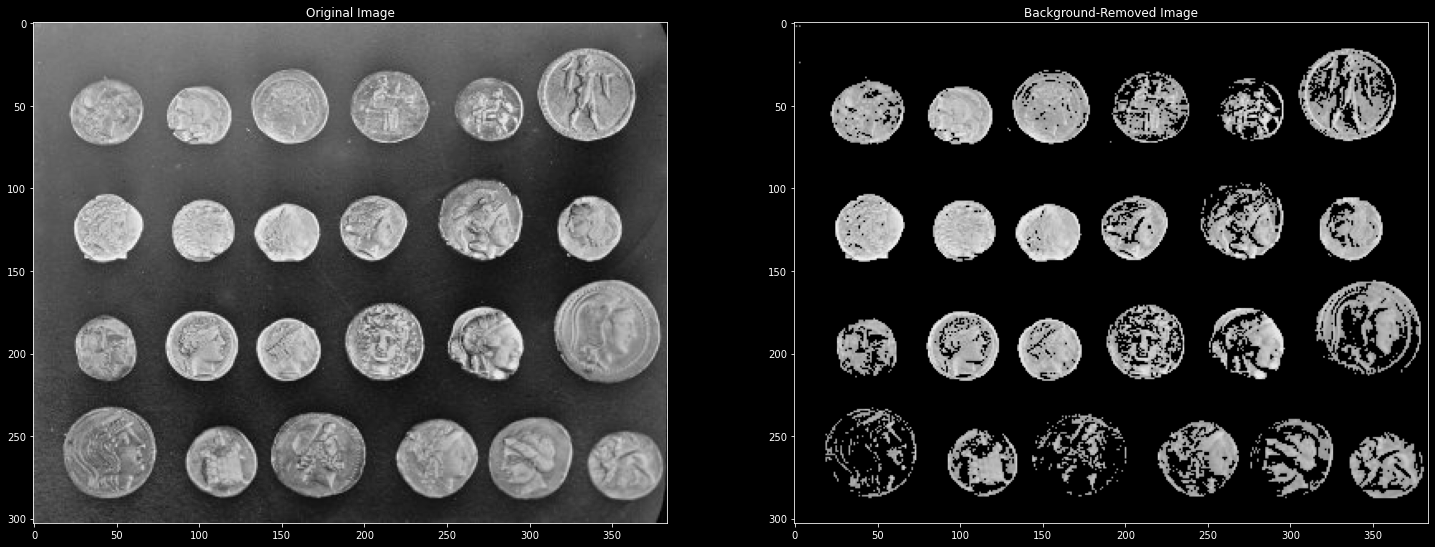

In [27]:
mask = (image_cluster == 0) + (image_cluster == 2) + (image_cluster == 9)
new_image = np.zeros(image.shape)
new_image[mask] = image[mask]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(25, 15))
axes[0].imshow(image, cmap="gray")
axes[0].title.set_text("Original Image")
axes[1].imshow(new_image, cmap="gray")
axes[1].title.set_text("Background-Removed Image")